<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/9thWeekTasks/BinaryClassificationNNHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [14]:
# Tentukan jalur ke file dataset
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca dataset sebagai DataFrame pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6974 - accuracy: 0.4706 - val_loss: 0.6965 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5157 - val_loss: 0.6916 - val_accuracy: 0.5114
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5108 - val_loss: 0.6873 - val_accuracy: 0.5114
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5098 - val_loss: 0.6833 - val_accuracy: 0.5114
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5117 - val_loss: 0.6793 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.5137 - val_loss: 0.6755 - val_accuracy: 0.5160
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5166 - val_loss: 0.6718 - val_accuracy: 0.5205
Epoch 8/100
3

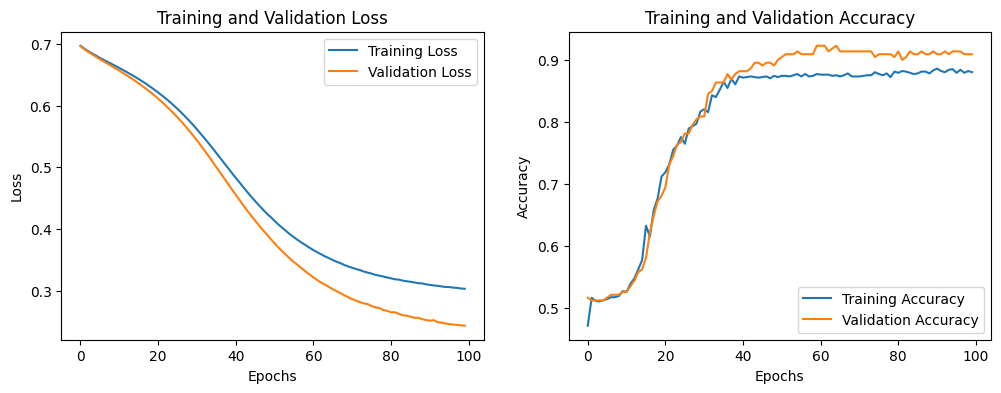

7/7 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.8995
Test Loss: 0.25888168811798096
Test Accuracy: 0.8995434045791626


In [15]:
# Memisahkan fitur dan target
features = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']]
target = df['AboveMedianPrice']

# Normalisasi fitur ke rentang [0, 1]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Membagi data menjadi training (70%) dan validation + testing (30%)
X_train, X_val_test, y_train, y_val_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Membagi data validation + testing menjadi validation (50%) dan testing (50%)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Membuat model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Visualisasi loss dan akurasi selama pelatihan
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Evaluasi model pada data testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')